# **E-news Express Project**

- <a href = #link6>Importing necessary libraries</a>
- <a href = #link2>Problem Statement</a>
- <a href = #link3>Reading and Understanding Data</a>
- <a href = #link4>Exploratory Data Analysis (EDA)</a>
- <a href = #link5>Statistical Analysis</a>


# <a name = 'link2'>Problem Statement</a>

#### Description 

#### Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

The design team of the company has created a new landing page. The task is to decide whether the new landing page is more effective to gather new subscribers. 100 users are selected randomly and divided equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. 

#### Objective:

Explore the dataset and extract insights from the data. Perform the statistical analysis to answer the following questions:

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Do the users spend more time on the new landing page than the old landing page?
* Is the conversion rate for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language?
* Is the mean time spent on the new page same for the different language users?


*Consider a significance level of 0.05 for all tests.

#### Data Dictionary:

* user_id - This represents the user ID of the person visiting the website.
* group - This represents whether the user belongs to the first group (control) or the second group (treatment).
* landing_page - This represents whether the landing page is new or old.
* time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
* converted - This represents whether the user gets converted to a subscriber of the news portal or not.
* language_preferred - This represents the language chosen by the user to view the landing page.

# <a name = 'link6'>Importing necessary libraries</a>

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

# <a name = 'link3'>Reading and Understanding Data</a>

In [2]:
df = pd.read_csv('abtest.csv') 
# first five rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:
* The data consists of 6 columns and the data in each row is related to a user

### Understand the shape of the data

In [3]:
# Find the shape or the number of rows and columns in the dataframe
df.shape

(100, 6)

#### Observations:
* There are 100 rows and 6 columns in this sample of data

### Applying info() method 

In [4]:
# information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations:
* There are 4 categorical values, 1 int and 1 float values in the dataframe
* All columns have 100 values indicating that there are no null values

In [5]:
# Checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Observations:
* There are no missing values in any columns

In [6]:
# summary of the data
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


### Observations:
* The mean time spent on the page by a user is 5.38.
* The mean and median of the time spent on the page is almost same

# <a name = 'link4'>Exploratory Data Analysis (EDA)</a>

### 1. Explore the dataset and extract insights using Exploratory Data Analysis.

### Univariate Analysis

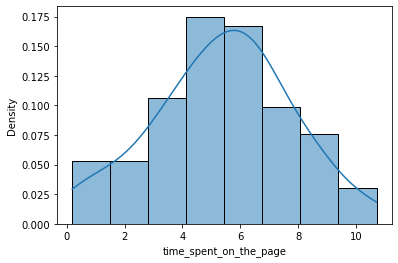

In [7]:
# Univariate analysis on time_spent_on_the_page
sns.histplot(df['time_spent_on_the_page'], kde=True, stat="density") # plot the distribution of data using histogram
plt.show()

### Observations:
* The time spent data is symmetrically distributed 
* There is no skewness in this plot
* The plot shows a normal distribution

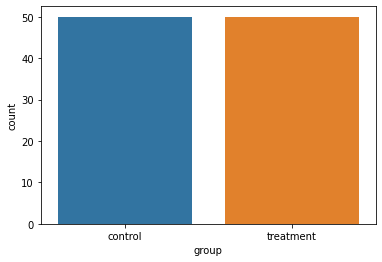

In [8]:
# Univariate analysis on group
sns.countplot(data=df,x='group')
plt.show()

### Observations:
* As mentioned in the problem statement, the sample has 2 groups (control and treatment) with equal number of users(50)

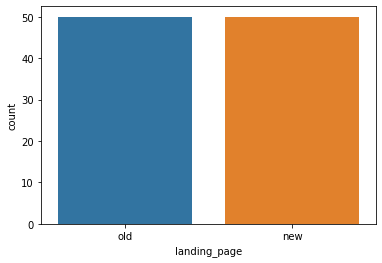

In [9]:
# Univariate analysis on landing page
sns.countplot(data=df,x='landing_page')
plt.show()

### Observations:
* As mentioned in the problem statement, the old and new landing pages are served to equal number of users(50)

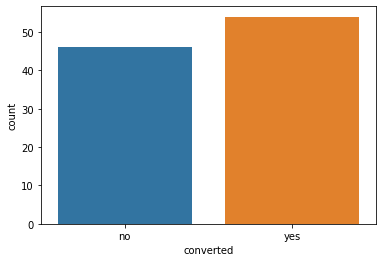

In [10]:
# Univariate analysis on landing page
sns.countplot(data=df,x='converted')
plt.show()

### Observations:
* There are more users who are getting converted than the users who are not getting converted to new landing page

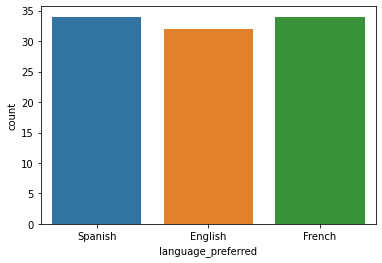

In [11]:
# Univariate analysis on language_preferred
sns.countplot(data=df,x='language_preferred')
plt.show()

### Observations:
* There is no significant change in the number of users for different languages.

### Bivariate Analysis

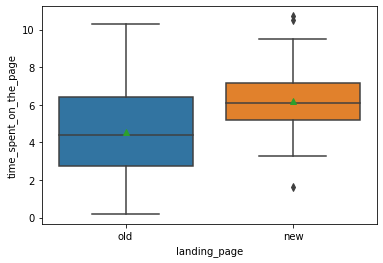

In [12]:
# Visual analysis to show the distribution of time spent on the old and new landing page
sns.boxplot(data=df,y='time_spent_on_the_page',x='landing_page',showmeans=True)
plt.show()

### Observations:
* The time spent on the new landing page has few outliers. 
* The mean time spent on the new landing page is more than the mean time spent on the old landing page.

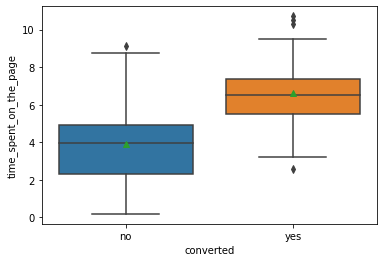

In [13]:
# Visual analysis to show the distribution of time spent on a page and the conversion rate
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page',showmeans=True)
plt.show()

### Observations:
* The users who got converted are spending more time on the landing page.
* There are more outliers in the data for those who are converted than those who are not converted.

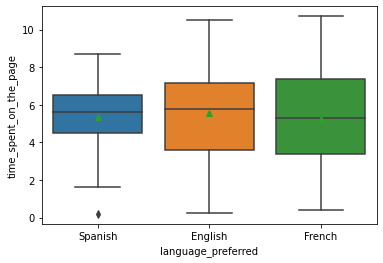

In [14]:
# Visual analysis for the distibution of time spent on the page and language preference
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page',showmeans=True)
plt.show()

### Observations:
* There is no significant difference in the mean time spent on a page based on the language preference of users.
* The amount of time spent on a page by users with Spanish language preference is less when compared to English and French.

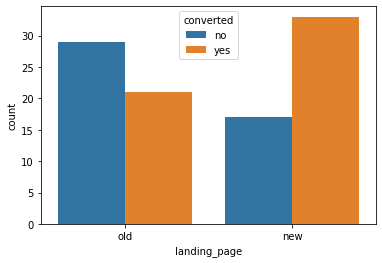

In [15]:
# Visual analysis for the distibution of landing page and converted users

sns.countplot(data=df,x='landing_page',hue='converted')
plt.show()

### Observations:
* The number of users getting converted are less in the case of old landing page.
* The number of users getting converted are much higher in the case of new landing page.

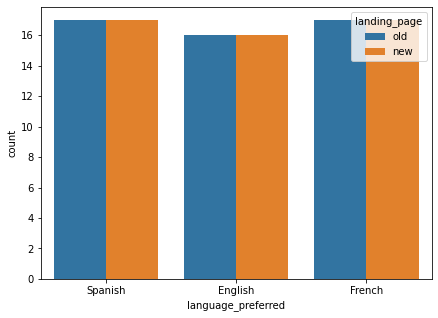

In [16]:
# Visual analysis to show the distribution of language preferred and landing page
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='language_preferred', hue='landing_page')
plt.show()

### Observations:
* There are equal number of users for different languages for old and new landing page.

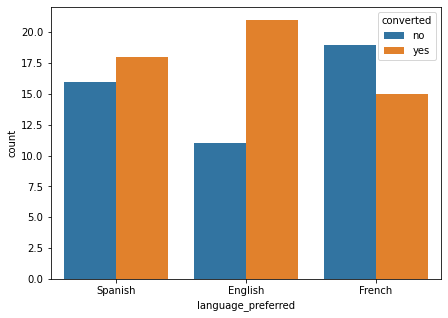

In [17]:
# Visual analysis to show the distribution of language preferred and converted
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.show()

### Observations:
* The users with language preference as English have very high conversion rates.
* The number of users getting converted with Spanish language preference are also more.
* In the case of French, the number of users getting converted are less.

### Multivariate Analysis

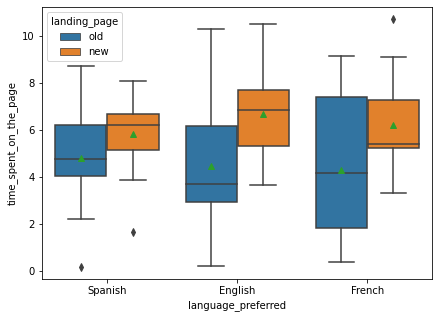

In [18]:
# Visual analysis to show the distribution of time spent on a page and language preferred with a hue on landing page
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='time_spent_on_the_page',x='language_preferred',showmeans=True,hue='landing_page')
plt.show()

### Observations:
* The mean time spent on the new and old landing pages are not same for all languages.
* The mean time spent on the new landing page is more for all languages than the old landing page.

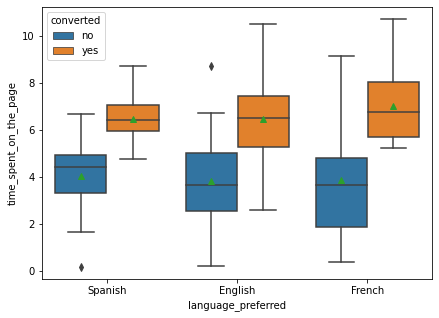

In [19]:
# Visual analysis to show the distribution of time spent on a page and language preferred with a hue on landing page
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y='time_spent_on_the_page',x='language_preferred',showmeans=True,hue='converted')
plt.show()

### Observations:
* For all languages, the users who spend more time on the landing page have more conversion rate

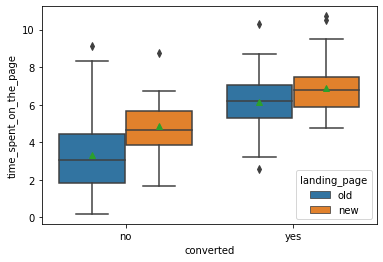

In [20]:
# Visual analysis to show the distribution of time spent on a page, the conversion rate and landing page
sns.boxplot(data=df,y='time_spent_on_the_page',x='converted',showmeans=True,hue='landing_page')
plt.show()

### Observations:
* The mean time spent by users on the new landing page is more.
* The mean time spent on a page by users who are getting converted is more when compared to users who are not getting converted.

# <a name = 'link5'>Statistical Analysis</a>

## 2. Do the users spend more time on the new landing page than the old landing page?

### Visual analysis to show the distribution of time spent on the new landing page and the old landing page

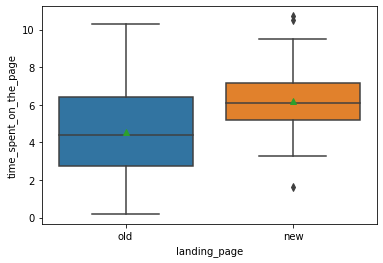

In [21]:
# Using boxplot to show the distribution of time spent on the old and new landing page
sns.boxplot(data=df,y='time_spent_on_the_page',x='landing_page',showmeans=True)
plt.show()

### Observations:
* The mean time spent on the new landing page is more than the mean time spent on the old landing page

### Conducting a hypothesis test to determine whether the users spend more time on the new landing page than the old landing page.

### Step 1: Define null and alternate hypotheses

𝐻0: The mean time spent on the new landing page is equal to the mean time spent on the old landing page.

𝐻𝑎: The mean time spent on the new landing page is greater than the mean time spent on the old landing page.

Let 𝜇1 and 𝜇2 be the mean time spent on the new landing page and the mean time spent on the old landing page.

Mathematically, the above formulated hypotheses can be written as:

𝐻0:𝜇1=𝜇2

𝐻𝑎:𝜇1>𝜇2

### Step 2: Select Appropriate test

This is a case of a one-tailed two-sample mean test. The two samples are independent in this case and also the population standard deviations are unknown. To assume if population standard deviation is equal or not, let's check the standard deviation of samples.

In [22]:
# find the sample standard deviations of time spent for the new landing page and old landing page to verify if it is equal or not
print('The standard deviation of time spent on the new landing page is ' + str(round(df[df['landing_page']=='new']['time_spent_on_the_page'].std(), 2)))#sample standard deviation of the time spent on new landing page
print('The standard deviation of time spent on the old landing page is ' + str(round(df[df['landing_page']=='old']['time_spent_on_the_page'].std(), 2)))#sample standard deviation of the time spent on old landing page

print(f"The ratio of standard deviation is {round(df[df['landing_page']=='new']['time_spent_on_the_page'].std(), 2)/round(df[df['landing_page']=='old']['time_spent_on_the_page'].std(),2)}")

The standard deviation of time spent on the new landing page is 1.82
The standard deviation of time spent on the old landing page is 2.58
The ratio of standard deviation is 0.7054263565891473


As an empirical rule, if the ratio of two sample standard deviations is between 0.7 and 1.4, the population standard deviations may be assumed to be equal. If the ratio is close to the extremes of this range as in this case, we can even consider performing an equality of variance in order to determine if the difference is statistically significant. We can perform a Levene test for confirming the same. 

##### Levene’s test
We will test the null hypothesis

𝐻0 : All the population variances are equal

against the alternative hypothesis

𝐻𝑎 : At least one variance is different from the rest

In [23]:
# importing the levene function from the stats library
from scipy.stats import levene

# find the p-value
statistic, p_value = levene(df[df['landing_page']=='new']['time_spent_on_the_page'],df[df['landing_page']=='old']['time_spent_on_the_page'])

print('The p-value is', p_value)

The p-value is 0.008950671168914445


#### Observations:
As the p-value is much less than 0.05, we will reject the null hypothesis. Hence, we do have enough evidence that the variances are different. 

The sample standard deviations are different as per the levenes test and hence the population standard deviations may be assumed to be different. 
We shall use 2 INDEPENDENT SAMPLES T-test for equality of means and unequal standard deviation in this problem.

### Step 3: Decide the significance level

As given in the problem statement, select 𝛼 = 0.05.

### Step 4: Calculate the p-value

scipy.stats.ttest_ind calculates the t-test on TWO INDEPENDENT samples of observations with equal_var as False since the standard deviation is unknown and assuming it to be unequal. This function returns the test statistic and p-value for a right-tailed t-test with the alternative parameter set to 'greater'.

In [24]:
# finding the p-value using ttest_ind function in stats library

test_stat, p_value = stats.ttest_ind(df[df['landing_page']=='new']['time_spent_on_the_page'], df[df['landing_page']=='old']['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 5: Comparing the p-value with 𝛼

In [25]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 6: Draw Inference

As the p_value is less than level of significance (0.05), we reject the null hypothesis. Hence, we do have enough evidence that the mean time spent on the new landing page is greater than the mean time spent on the old landing page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Visual analysis of conversion rate for old and new landing page

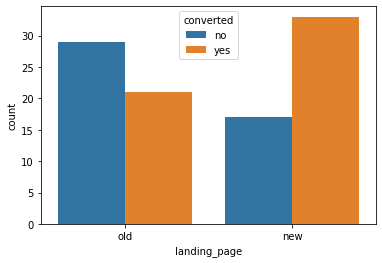

In [26]:
# Using countplot to show the distribution of conversion rate for old and new landing page

sns.countplot(data=df,x='landing_page',hue='converted')
plt.show()

### Observations:
* The plot shows that the conversion rate for new landing page is greater than the old landing page

### Conducting a hypothesis test to determine whether the conversion rate for the new page is greater than the conversion rate for the old page.

### Step 1: Define null and alternate hypotheses

H0: The proportions of conversion rate for new and old landing page is equal.
𝐻𝑎: The proportion of conversion rate for new landing page is greater than the conversion rate for old landing page

Let  𝑝1,𝑝2  be the proportions of conversion rate for new and old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

𝐻0: 𝑝1=𝑝2 

𝐻𝑎: 𝑝1>𝑝2

### Step 2: Select Appropriate test

The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion.

Let's verify if the assumption for 2 proportions z-test staisfies or not: np and n(1-p) >=10

In [27]:
# find the number of converted users with new landing page
n_new = df[df['landing_page']=='new'].converted.value_counts()['yes']

# find the number of converted users with old landing page
n_old = df[df['landing_page']=='old'].converted.value_counts()['yes']

# calculating np and n(1-p) for new and old landing page. number of observations for old and new landing page is 50
n1p1=50*(n_new/50)
n1minusp1=50*(1-(n_new/50))
n2p2=50*(n_old/50)
n1minusp2=50*(1-(n_old/50))
if n1p1 and n1minusp1 and n2p2 and n1minusp2 >= 10:
    print("Assumption for 2 proportions z-test staisfied: np and n(1-p) >=10")

Assumption for 2 proportions z-test staisfied: np and n(1-p) >=10


The assumption for 2 proportions test is satisfied. We shall use a Two Proportion Z-test in this problem.

### Step 3: Decide the significance level

As given in the problem statement, select 𝛼 = 0.05.

### Step 4: Collect and prepare data

In [28]:
# Sample size is 100 and it is equally divided to 2 groups using old and new landing page
n_obs=[50,50] #total number of observations for new and old landing page

n_converted=[n_new,n_old] #number of converted users for new and old landing page

### Step 5: Calculate the p-value

In [29]:
# import the required package for proportions z-test from statsmodels.stats library
from statsmodels.stats.proportion import proportions_ztest

# find the p-value using proportion_ztest
stat, p_value = proportions_ztest(n_converted, n_obs, alternative = 'larger')

# print the p-value
print('The p-value is '+ str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [30]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p_value is less than 0.05, we reject the null hypothesis. Hence, we do have enough evidence that the conversion rate for new landing page is greater than the conversion rate for old landing page.

## 4. Does the converted status depend on the preferred language?

### Visual analysis of language preferred and converted status

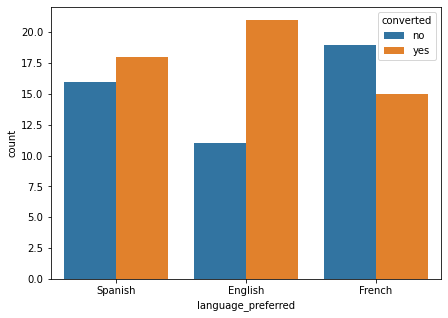

In [31]:
# Using countplot to show the distribution of language preferred with a hue on converted status
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.show()

### Observations:
* The users with language preference as English have very high conversion rates.
* The number of users getting converted with Spanish language preference are also more.
* In the case of French, the number of users getting converted are less.

### Conducting a hypothesis test to determine whether the converted status depend on the preferred language

### Step 1: Define null and alternate hypotheses

We will test the null hypothesis

    𝐻0:  Converted status is independent of language preference.

against the alternate hypothesis

    𝐻𝑎:  Converted status depends on language preference.

### Step 2: Select Appropriate test

This is a problem of Chi-Square test of independence, concerning the two independent categorical variables, language preference and converted status. All the below assumptions for this test is met.
* Categorical variables
* Expected value of the number of sample observations in each level of the variable is at least 5
* Random sampling from the population

### Step 3: Decide the significance level

As given in the problem statement, select 𝛼 = 0.05.

### Step 4: Collect and prepare data

In [32]:
#preparing the contingency table using crosstab function
cont_table= pd.crosstab(df['language_preferred'],df['converted'])
cont_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [33]:
# calculating p_value using chi2_contingency function
chi, p_value, dof, expected = stats.chi2_contingency(cont_table)
print('The p-value is ', p_value)

The p-value is  0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [34]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is greater than the level of significance (0.05), we fail to reject the null hypothesis. Hence, we do not have enough evidence to say that the converted status is dependent on the preferred language.

## 5. Is the mean time spent on the new page same for the different language users?

### Visual analysis of the mean time spent on new landing page for different language users

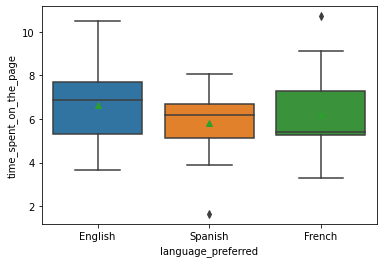

In [35]:
#Using boxplot to show the distibution of the mean time spent on the new landing page for different language users
sns.boxplot(data=df[df.landing_page=='new'],x='language_preferred',y='time_spent_on_the_page',showmeans=True)
plt.show()

### Observations:
* The plot shows that the mean time spent on the new page is different for different language users.

### Conducting a hypothesis test to determine whether the mean time spent on new landing page is same for different language users

### Step 1: Define null and alternate hypotheses

Let  𝜇1,𝜇2,𝜇3  be the means of time spent on new landing page for English, Spanish and French languages respectively.

We will test the null hypothesis

    𝐻0: The mean time spent on new landing page is same for all languages
    
    𝜇1=𝜇2=𝜇3 
    
    against the alternative hypothesis

    𝐻𝑎: Atleast one language has a different mean time spent on the new landing page from the rest.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

We will test the null hypothesis

    𝐻0:  The time spent on the new landing page follows a normal distribution

    against the alternative hypothesis

    𝐻𝑎:  The time spent on the new landing page does not follow normal distribution

In [36]:
# Assumption 1: Normality
# Using shapiro function for this test

# find the p-value
w, p_value = stats.shapiro(df[df.landing_page=='new']['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


#### Observation:
Since p-value is greater than 0.05, we fail to reject the null hypothesis. Hence, we do have enough evidence to say that the time spent on the new landing page follows a normal distribution

#### Levene's Test

We will test the null hypothesis

    𝐻0 : All the population variances are equal

against the alternative hypothesis

    𝐻𝑎 : At least one variance is different from the rest

In [37]:
#Assumption 2: Homogeneity of Variance

df_new=df[df['landing_page']=='new'].copy() #create a dataframe of new landing page

# Using levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


#### Observation:
Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis and hence we have enough evidence that the population variances are equal.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [38]:
# Separating the time spent by each language users
time_english=df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
time_spanish=df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']
time_french=df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [39]:
# perform one-way anova test using the f_oneway function from scipy.stats library
test_stat, p_value = stats.f_oneway(time_english, time_spanish, time_french)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with  𝛼 

In [40]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is greater than 0.05, we fail to reject the null hypothesis. Hence, we do have enough evidence to say that the mean time spent on the new page is same for different language users.

## The conclusions and business recommendations derived from the analysis.

After all the analysis of the data from online news portal E-news Express, below are the conclusions derived:

### Conclusions:
1. The conversion rate for new landing page is greater than the conversion rate for old landing page.
2. The users who got converted are spending more time on the landing page.
3. The mean time spent on the new landing page is more than the mean time spent on the old landing page.
4. The mean time spent on the new page is same for different language users.
5. Though statistically there is not enough evidence to prove that the conversion rate depends on the language preference, the number of users with English language preference have more conversion rate visually.

### Recommendations:

* Statistically, there is not enough evidence to prove that the conversion rate depends on the language preference. 
* Visually, the users with language preference as French have very less conversion rate when compared to other language users. 
* Adding new features in the landing page that attracts French language users may help to increase the subscription rate.


### Further Analysis:
* Statistical analysis proved that the users who got converted are spending more time on the landing page. 
* The visual analysis shows that the French language users are spending more time on the landing page, but their conversion rate is less. 
* A further analysis is needed to identify the factors that is impacting the conversion rate of French language users.


======================================================================================================================